<a href="https://colab.research.google.com/github/nandroidj/ai-intro/blob/main/intro_ai_iglesias_i507.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# PCA
from sklearn import decomposition

# SVM
from sklearn import svm

# decision tree
from sklearn import tree

# k-Nearest neighbours
from sklearn import neighbors

# perceptron - clasificacion
from sklearn.neural_network import MLPClassifier
# perceptron - regresion
from sklearn.neural_network import MLPRegressor

# Dataset

In [2]:
from google.colab import files
files.upload()
!ls

Saving winequality-red_m.csv to winequality-red_m.csv
Saving winequality-white_m.csv to winequality-white_m.csv
drive  sample_data  winequality-red_m.csv  winequality-white_m.csv


In [3]:
# se almacenan los csv importados en dataframes separados

df_red_wine = pd.read_csv("winequality-red_m.csv", delimiter=";")
df_white_wine = pd.read_csv("winequality-white_m.csv", delimiter=";")

print("red wine", df_red_wine)
print("white wine", df_white_wine)

red wine       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             NaN      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur 

# Preprocesamiento

In [4]:
# se imprimen las primeras filas (por defecto) del dataframe correspondiente a vino tinto
df_red_wine.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,NaN,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# se imprimen las primeras filas (por defecto) del dataframe correspondiente a vino blanco
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
# se agrega una columna de tipo bool para determinar si el vino es tinto (1) o blanco (0)

df_red_wine['type'] = 1
df_white_wine['type'] = 0

print("red wine", df_red_wine)
print("white wine", df_white_wine)

red wine       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             NaN      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur 

In [10]:
# por recomendación, chequeo qué cantidad de valores correspondiente a cada columna de los dataframes son null
df_red_wine.isnull().sum()

# con el metodo dropna se desestiman aquellas filas que contengan al menos un campo null
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
df_red = df_red_wine.dropna()

print(df_red)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [11]:
# se repite el proceso para el dataframe de vino blanco
df_white_wine.isnull().sum()

df_white = df_white_wine.dropna()

print(df_white)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [37]:
# se concatenan ambos dataframes para visualizar la distribución resultante
# https://pandas.pydata.org/docs/reference/api/pandas.concat.html

df_result = pd.concat( [df_red, df_white] )

# se utiliza reset_indez tq. se descarten los índices pronvenientes de cada df
df_result.reset_index(
    inplace=True, 
    drop=True
  ) 

print(df_result)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
6334            6.2              0.21         0.29             1.6      0.039   
6335            6.6              0.32         0.36             8.0      0.047   
6336            6.5              0.24         0.19             1.2      0.041   
6337            5.5              0.29         0.30             1.1      0.022   
6338            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

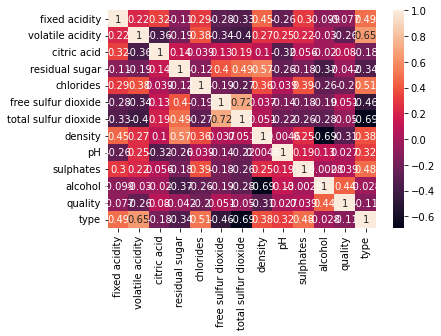

In [47]:
# se visualiza la matriz de correlación tq. sea posible determinar las relaciones de mayor relevancia (peso)
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
# https://datatofish.com/correlation-matrix-pandas/

df_correlation = df.corr()
sns.heatmap(df_correlation, annot=True)
plt.show()

# Clasificación y Predicción



In [66]:
# se deja listo el escalamiento para ambos modelos. cabe destacar que solo se normalizan los valores de entrada (eje X)

scale_classification = preprocessing.MinMaxScaler()
scale_regression = preprocessing.MinMaxScaler()

## Clasificación

In [73]:
df = df_result

# unicamente se selecciona la columna agregada en el preprocesamiento de datos correspondiente al tipo de vino 
x_classification = df.drop( columns=['type'] ).values
y_classification = df['type']

scale_classification.fit(x_classification)
x_classification = scale_classification.transform(x_classification)


x_train_classification, x_test_classification, y_train_classification, y_test_classification = train_test_split(
    x_classification, 
    y_classification, 
    test_size=0.2,
    random_state=42
)



## Predicción

In [76]:
x_regression = df.drop(columns=['quality']).values
y_regression = df['quality']

scale_regression.fit(x_regression)
x_regression = scale_regression.transform(x_regression)
x_regression.shape

x_train_regression, x_test_regression, y_train_regression, y_test_regression = train_test_split(
    x_regression, 
    y_regression, 
    test_size=0.2,
    random_state=42
)

print("input train + test", x_train_regression.shape, x_test_regression.shape)
print("output train + test", y_train_regression.shape, y_test_regression.shape)



input train + test (5071, 12) (1268, 12)
output train + test (5071,) (1268,)


# Modelo SVM 

## Clasificación

In [77]:
red_quantity = (y_train_classification==1).sum()
white_quantity = (y_train_classification==0).sum()

classification_weight = white_quantity/red_quantity

In [78]:
# https://scikit-learn.org/stable/modules/svm.html

# se procesa el modelo con la funcion de kernel lineal indicando el peso obtenido previamente y luego se compara frente al dataset de test

svm_classification = svm.SVC(
    kernel="linear", 
    class_weight={1: classification_weight}
) 
svm_classification.fit(
    x_train_classification, 
    y_train_classification
)

accuracy = svm_classification.score(
    x_test_classification, 
    y_test_classification         
)

print(accuracy)



0.9929022082018928


In [79]:
# se procesa el modelo con la funcion de kernel RBF

svm_classification = svm.SVC(
    kernel="rbf", 
    class_weight={1: classification_weight}
) 
svm_classification.fit(
    x_train_classification, 
    y_train_classification
)

accuracy = svm_classification.score(
    x_test_classification, 
    y_test_classification         
)

print(accuracy)


0.9960567823343849


## Regresion

In [80]:
svm_regression = svm.SVR(
    kernel="linear", 
    C=10, 
    epsilon=0.1
)
svm_regression.fit(
    x_train_regression,
    y_train_regression
)

accuracy = svm_regression.score(
    x_test_regression, 
    y_test_regression
)

print(accuracy)

0.2950167177476444


In [81]:
svm_regression = svm.SVR(
    kernel="poly", 
    C=10, 
    gamma="scale", 
    degree=4, 
    epsilon=0.1
)
svm_regression.fit(
    x_train_regression, 
    y_train_regression
)

accuracy = svm_regression.score(
    x_test_regression, 
    y_test_regression
)

print(accuracy)

0.34747446921950986


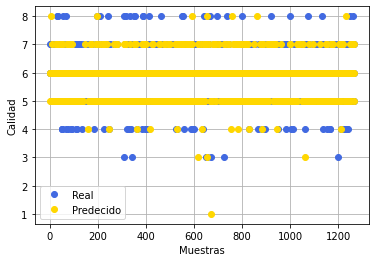

In [84]:
y_prediction_regression = svm_regression.predict(x_test_regression)
metrics.mean_squared_error(y_prediction_regression, y_test_regression)
y_test_regression_index = y_test_regression.reset_index()

# conversion al entero mas cercano
y_prediction_regression_round = [np.round(x) for x in (y_prediction_regression)]

plt.plot(
    y_test_regression_index['quality'],
    'o', 
    color="royalblue"
)
plt.plot(
    y_prediction_regression_round,
    'o', 
    color="gold"
)

plt.legend(['Real', 'Predecido'])
plt.ylabel('Calidad')
plt.xlabel('Muestras')

plt.grid()
plt.show()

# Árbol de decisión



## Clasificacion

In [89]:
decision_tree_classification = tree.DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=10
)

decision_tree_classification.fit(
    x_train_classification,
    y_train_classification
)

decision_tree_classification.predict(x_test_classification)

accuracy = decision_tree_classification.score(
    x_test_classification, 
    y_test_classification
)
print(accuracy)

0.972397476340694


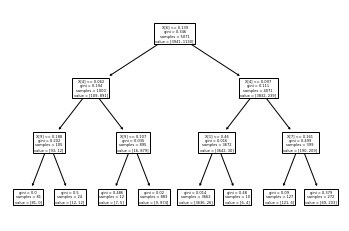

In [90]:
tree.plot_tree(decision_tree_classification)
plt.show()

## Regresion

In [98]:
decision_tree_regression = tree.DecisionTreeRegressor(max_depth=4)
decision_tree_regression.fit(
    x_train_regression,
    y_train_regression
)

decision_tree_prediction = decision_tree_regression.predict(x_test_regression)
metrics.mean_squared_error(
    decision_tree_prediction, 
    y_test_regression
)

0.5109983874932007

# kNN

## Clasificacion

In [99]:
knn_classification = neighbors.KNeighborsClassifier(
    n_neighbors=10, 
    weights='distance'
)
knn_classification.fit(
    x_train_classification, 
    y_train_classification
)

accuracy = knn_classification.score(
    x_test_classification,
    y_test_classification
)

print(accuracy)

0.9968454258675079


## Regresion

In [100]:
knn_regression_accuracy = np.array([])
array = np.arange(1, 50, 1)

for i in array:
  # Llamo al modelo de regresión de kNN seteando la cantidad de vecinos
  knn_regression = neighbors.KNeighborsRegressor(
      n_neighbors=i, 
      weights='distance'
  ) 

  knn_regression.fit(
      x_train_regression,
      y_train_regression
  )

  accuracy = knn_regression.score(
      x_test_regression, 
      y_test_regression
  )
  accuracy_knn_reg = np.append(
      knn_regression_accuracy, 
      np.array([accuracy])
  )


print(knn_regression_accuracy)

[]


# Red Neuronal

## Clasificacion

In [106]:
# con clasificador MLP, perceptron de multiples capas

mlp_classification_accuracy = np.array([])
nodes = np.arange(1, 20, 1)

for i in nodes:

 
 mlp_classification = MLPClassifier(
         solver='sgd',
         max_iter=500,
         alpha=1e-5,
         hidden_layer_sizes=(i,),
         tol=1e-3,
         random_state=1
 )

 mlp_classification.fit(
          x_train_classification,
          y_train_classification
 )

 accuracy = mlp_classification.score(
          x_test_classification,
          y_test_classification
 )
 mlp_classification_accuracy = np.append(mlp_classification_accuracy, np.array([accuracy]))


print(np.max(mlp_classification_accuracy))

0.9865930599369085


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


## Regresion

In [107]:
# con clasificador MLP, perceptron de multiples capas

mlp_regression_accuracy = np.array([])
nodes = np.arange(1, 20, 1)

for i in nodes:

 
 mlp_regression = MLPRegressor(
         solver='sgd',
         max_iter=500,
         learning_rate_init=10e-4,
         alpha=1e-5,
         hidden_layer_sizes=(i,),
         tol=1e-3,
         random_state=1
 )

 mlp_regression.fit(
          x_train_regression,
          y_train_regression
 )

 accuracy = mlp_regression.score(
          x_test_regression,
          y_test_regression
 )
 mlp_regression_accuracy = np.append(
     mlp_regression_accuracy, 
     np.array([accuracy])
 )


print(np.max(mlp_regression_accuracy))

0.2433353383947926
